In [1]:
import numpy as np
import scipy.sparse as sp

from mnist import MNIST

In [2]:
from least_squares import Ridge

In [3]:
import pandas as pd
%matplotlib inline

import seaborn as sns

/Users/janet/miniconda3/envs/mlpy3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [4]:
mndata = MNIST('./python-mnist/data')
train_ims, train_labels = mndata.load_training()
test_ims, test_labels = mndata.load_testing()

train_ims = np.array(train_ims)
test_ims = np.array(test_ims)
train_istwo = np.array([int(x==2) for x in train_labels])
test_istwo = np.array([int(x==2) for x in test_labels])

In [5]:
train_X = sp.csc_matrix(train_ims)
train_y = sp.csc_matrix([train_istwo]).T

In [6]:
result = Ridge(X = train_X, y = train_y, lam = 0.05)

In [7]:
result.solve_coeffs()

/Users/janet/miniconda3/envs/mlpy3/lib/python3.5/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:247: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
/Users/janet/miniconda3/envs/mlpy3/lib/python3.5/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:165: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  'is in the CSC matrix format', SparseEfficiencyWarning)


In [35]:
import analyze_ridge_results
from imp import reload

In [36]:
reload(analyze_ridge_results)

<module 'analyze_ridge_results' from '/Users/janet/Machine_Learning_CSE_546/HW1/Q6_least_squares/analyze_ridge_results.py'>

In [37]:
results = analyze_ridge_results.analyze_results(result, 0.29)

In [41]:
import matplotlib as mpl

In [44]:
mpl.rcParams['figure.figsize'] = 4, 3

   labels  predictions
0       0    -0.094216
1       0    -0.105843
2       0     0.142369
3       0     0.081353
4       0    -0.014759
(60000, 2)


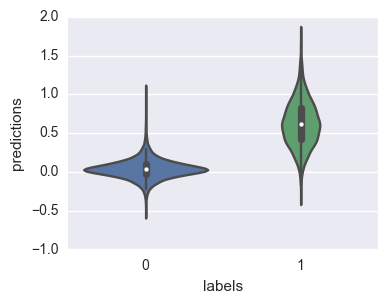

In [45]:
to_compare = pd.DataFrame({"predictions": result.y_preds, 
                           "labels": result.y.toarray()[:,0]})

print(to_compare.head())
print(to_compare.shape)

plot = sns.violinplot(x='labels', y='predictions',
               data=to_compare, size=2)

plot.figure.savefig("MINST_regression_distributions.pdf")


   labels  predictions
0       0    -0.094216
1       0    -0.105843
2       0     0.142369
3       0     0.081353
4       0    -0.014759
(60000, 2)


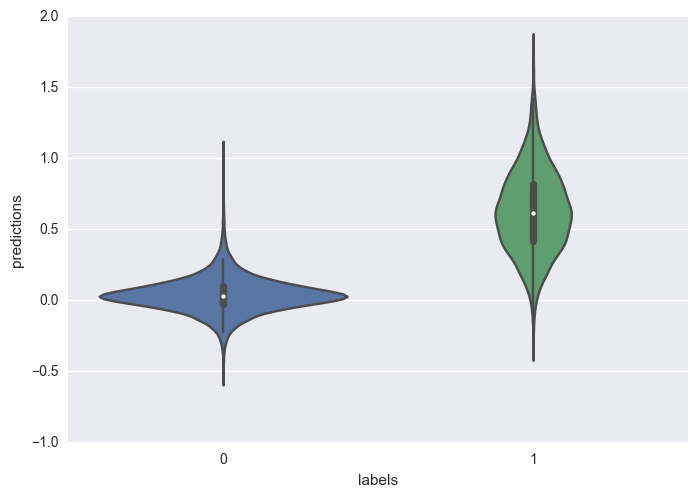

In [39]:
plot = analyze_ridge_results.plot_results(result.y_preds, result.y.toarray()[:,0])

In [34]:
plot.figure.savefig("MINST_classification.pdf", height = 2)